In [1]:
!pip install tensorflow_text
import pandas as pd

df_bb = pd.read_csv('/content/imdb_barbie_Uncleaned.csv', header=None)
df_op = pd.read_csv('/content/imdb_oppenhimmer_Uncleaned.csv', header=None)
df_bb.drop_duplicates(inplace=True)
df_op.drop_duplicates(inplace=True)


# Regular Expression

In [2]:
import re

score_Reg = '(\d{1,2})\/\d{1,2}\s.*\s'
title_Reg = '\d{1,2}\/\d{1,2}\s(.*)'
people_found_helpful_Reg = '([\d,]*) out of ([\d,]*) found this helpful'
username_Reg = '\d{1,2}\/\d{1,2}\s.*\s([A-Za-z0-9_-]+)\d{2}\s[January|February|March|April|June|July|August|September|October|November|December]'
date_Reg = '(\d{1,2}\s\w+\s\d{4})'
review_Reg = '\d{1,2}\s\w+\s\d{4}\s([\s\S]*)\s[\d,]* out of [\d,]* found this helpful'

# Cleaning Data

In [3]:
# Clean every row in data set

def get_cleaned_df(dirty_df):
	# cleaned_df = pd.DataFrame(columns=['score', 'title', 'username', 'date', 'people_found_helpful', 'review'])
	cleaned_df = pd.DataFrame(columns=['score', 'title', 'username', 'date', 'people_found_helpful', 'total_people_viewed', 'review'])

	for index in range(len(dirty_df)):
		row = dirty_df.iloc[index][0]

		score = re.findall(score_Reg, row)
		title = re.findall(title_Reg, row)
		username = re.findall(username_Reg, row)
		date = re.findall(date_Reg, row)
		people_found_helpful = re.findall(people_found_helpful_Reg, row)
		review = re.findall(review_Reg, row)

		if not score:
			continue
		else:
			score = int(score[0])
		if not title:
			title = ['NULL']
		if not username:
			username = ['NULL']
		if not date:
			date = ['NULL']
		if not people_found_helpful:
			people_found_helpful = 'NULL'
			total_people_viewed = 'NULL'
		else:
			total_people_viewed = int(people_found_helpful[0][1].replace(',', ''))
			people_found_helpful = int(people_found_helpful[0][0].replace(',', ''))
		if not review:
			review = ['NULL']

		cleaned_df.loc[index] = [score, title[0], username[0], date[0], people_found_helpful, total_people_viewed, review[0]]
	return cleaned_df


In [4]:
cleand_df_bb = get_cleaned_df(df_bb)
cleand_df_bb.drop_duplicates(subset=['username'], inplace=True)

In [5]:
cleand_df_bb

,score,title,username,date,people_found_helpful,total_people_viewed,review
0,6,Creative but preachy and confusing,Imshortok06,23 July 2023,1007,1363,I'm just going to get straight to the point: I...
1,6,"Beautiful film, but so preachy",LoveofLegacy,21 July 2023,1190,1646,"Margot does the best with what she's given, bu..."
2,6,Clever and fun beginning turns into another le...,Binkconn,21 July 2023,804,1173,"Barbie begins in an irresistible way, as a fun..."
3,8,It was depressing,coxaneesa,24 July 2023,152,242,Warning: Spoilers
4,9,A Technicolor Dream,heatherhilgers,24 July 2023,20,26,"Wow, this movie was a love letter to cinema. F..."
...,...,...,...,...,...,...,...
792,2,Barbie-not good,thongman,22 July 2023,5,17,The only reason this movie even gets a 2 from ...
793,5,Feminism but the rest?,iyaseminkose,23 July 2023,1,6,"I'm NOT a Barbie girl in NOT the Barbie World,..."
794,3,"Great sets, great execution but horrible story...",DaHermitKid,28 July 2023,1,5,"Firstly, the technical execution is top notch...."
795,2,Just meh.,apriljosey-29034,27 July 2023,0,1,Warning: Spoilers


In [6]:
cleand_df_op = get_cleaned_df(df_op)
cleand_df_op.drop_duplicates(subset=['username'], inplace=True)

In [7]:
cleand_df_op

,score,title,username,date,people_found_helpful,total_people_viewed,review
0,9,Murphy is exceptional,Orlando_Gardner,19 July 2023,1413,1597,You'll have to have your wits about you and yo...
1,8,"A challenging watch to be sure, but a worthwhi...",Jeremy_Urquhart,20 July 2023,685,819,One of the most anticipated films of the year ...
2,10,A brilliantly layered examination of a man thr...,MrDHWong,20 July 2023,556,691,"""Oppenheimer"" is a biographical thriller film ..."
3,10,Nolan delivers a powerfull biopic that shows t...,and_mikkelsen,20 July 2023,358,457,This movie is just... wow! I don't think I hav...
4,10,A Masterpiece,mohameddawoud-26019,19 July 2023,670,833,I may consider myself lucky to be alive to wat...
...,...,...,...,...,...,...,...
2031,7,"Huge story, but production fails sometimes",andreverschoor,27 July 2023,1,3,"Loved the movie, loved the actors efforts. Aft..."
2032,6,Tweaked,fmacr,25 July 2023,1,7,"I suppose these reviews are tweaked, otherwise..."
2033,6,Just a 6 for a near perfect film.,m-nicolaou-86-661254,24 July 2023,0,1,Ok let me start by the obvious ratings which w...
2034,6,No need to be 3 hours,scottahaynie,24 July 2023,0,0,Acting was tremendous and the true story behin...


# Graphing for Exploration

In [8]:
# combine the two data sets

cleand_df_bb['isBarbie'] = 1
cleand_df_op['isBarbie'] = 0

df = pd.concat([cleand_df_bb, cleand_df_op], ignore_index=True)

In [9]:
df.dtypes

score                    int64
title                   object
username                object
date                    object
people_found_helpful     int64
total_people_viewed      int64
review                  object
isBarbie                 int64
dtype: object

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
# Creating graphable data
df = df[~df['date'].str.contains('IMAX')]
# numeric_df = pd.DataFrame(columns=['isBarbie', 'score', 'people_found_helpful', 'total_people_viewed', 'helpful_ratio', 'date', 'date_from_release','length_of_title', 'length_of_username', 'length_of_review'])
numeric_df = pd.DataFrame(columns=['isBarbie', 'score', 'date', 'people_found_helpful', 'total_people_viewed', 'helpful_ratio','length_of_title', 'length_of_username', 'length_of_review'])

numeric_df['isBarbie'] = df['isBarbie']
numeric_df['score'] = df['score']
numeric_df['date'] = df['date']
numeric_df['total_people_viewed'] = df['total_people_viewed']
numeric_df['people_found_helpful'] = df['people_found_helpful']
numeric_df['helpful_ratio'] = df['people_found_helpful'] / df['total_people_viewed']
numeric_df['length_of_title'] = df['title'].apply(lambda x: len(x))
numeric_df['length_of_username'] = df['username'].apply(lambda x: len(x))
numeric_df['length_of_review'] = df['review'].apply(lambda x: len(x))

numeric_df['date'] = pd.to_datetime(df['date'], format='%d %B %Y')
numeric_df['date_from_release'] = (numeric_df['date'] - pd.to_datetime('2023-07-23', format='%Y-%m-%d')).dt.days

In [12]:
numeric_df

,isBarbie,score,date,people_found_helpful,total_people_viewed,helpful_ratio,length_of_title,length_of_username,length_of_review,date_from_release
0,1,6,2023-07-23,1007,1363,0.738811,34,11,1216,0
1,1,6,2023-07-21,1190,1646,0.722965,30,12,786,-2
2,1,6,2023-07-21,804,1173,0.685422,69,8,601,-2
3,1,8,2023-07-24,152,242,0.628099,17,9,17,1
4,1,9,2023-07-24,20,26,0.769231,19,14,1239,1
...,...,...,...,...,...,...,...,...,...,...
2792,0,7,2023-07-27,1,3,0.333333,42,14,624,4
2793,0,6,2023-07-25,1,7,0.142857,7,5,1152,2
2794,0,6,2023-07-24,0,1,0.000000,33,20,1369,1
2795,0,6,2023-07-24,0,0,NaN,21,12,609,1


<ipython-input-13-ab22f046f215>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=drop_na_df.corr(), ax=ax1, cmap=cmap, annot=True)


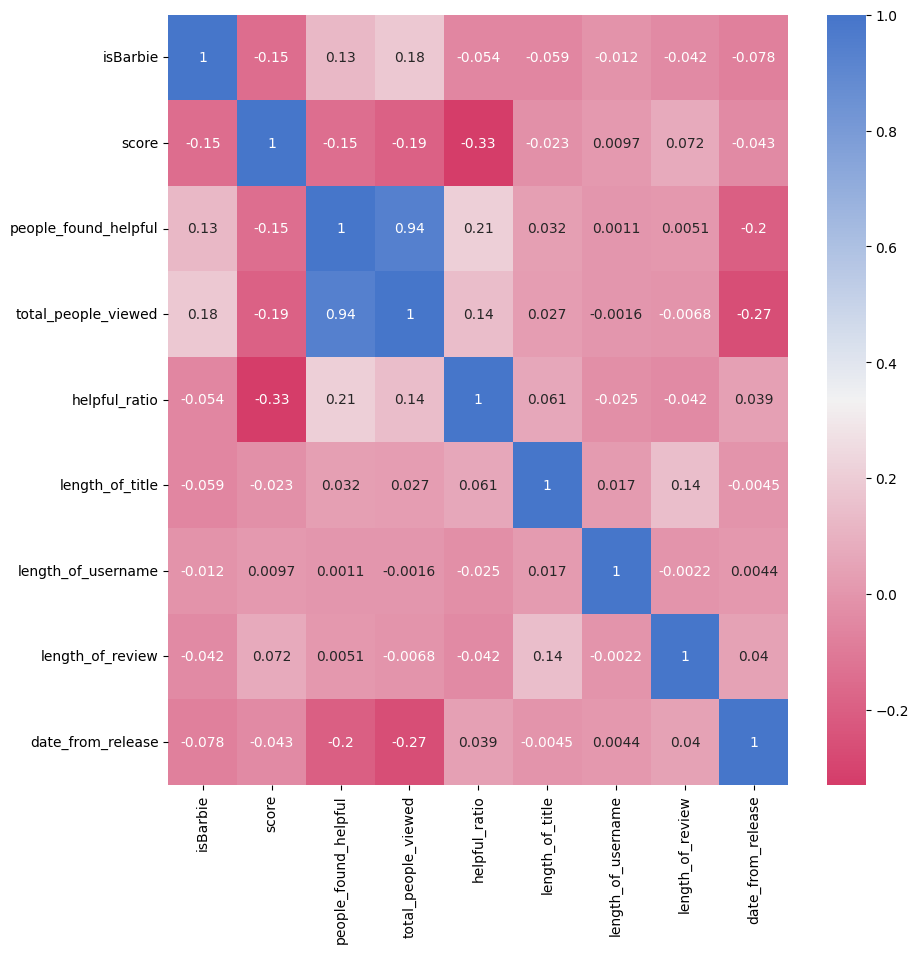

In [13]:
# Coorelation Matrix

drop_na_df = numeric_df[numeric_df['score'] != 'NULL']

fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)

cmap = sns.diverging_palette(0, 255, n=256, as_cmap=True)

sns.heatmap(data=drop_na_df.corr(), ax=ax1, cmap=cmap, annot=True)

plt.show()

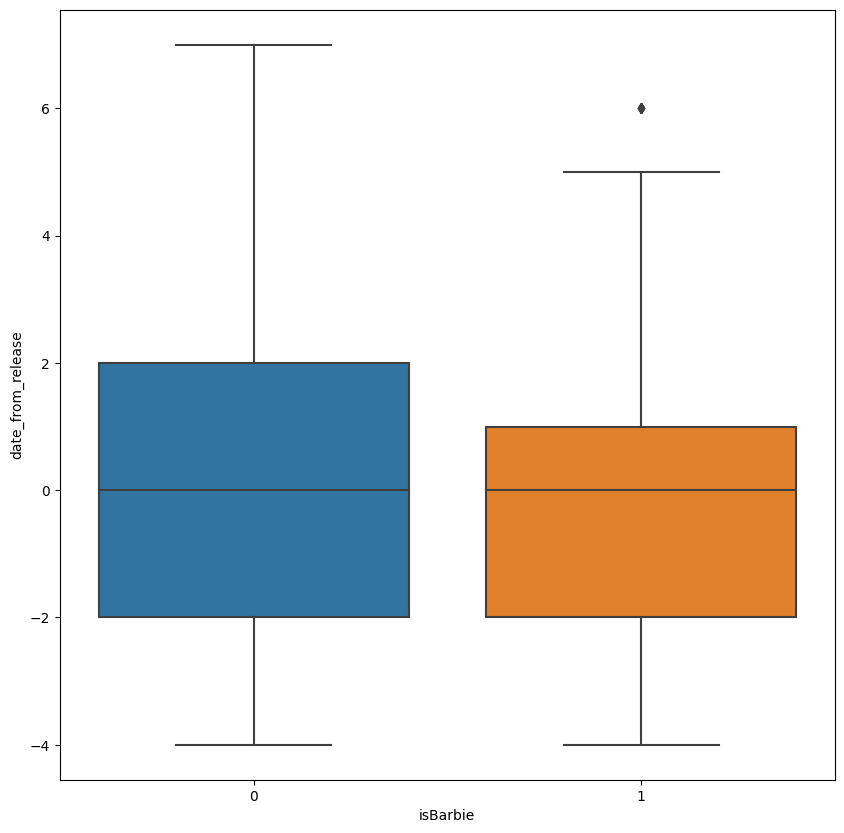

In [14]:
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(111)

sns.boxplot(data=numeric_df, x='isBarbie', y='date_from_release', ax=ax2)

plt.show()

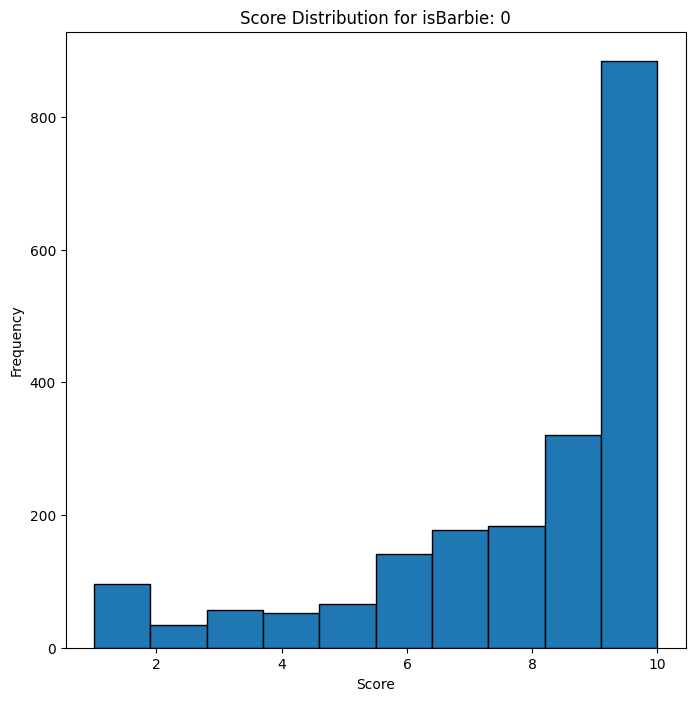

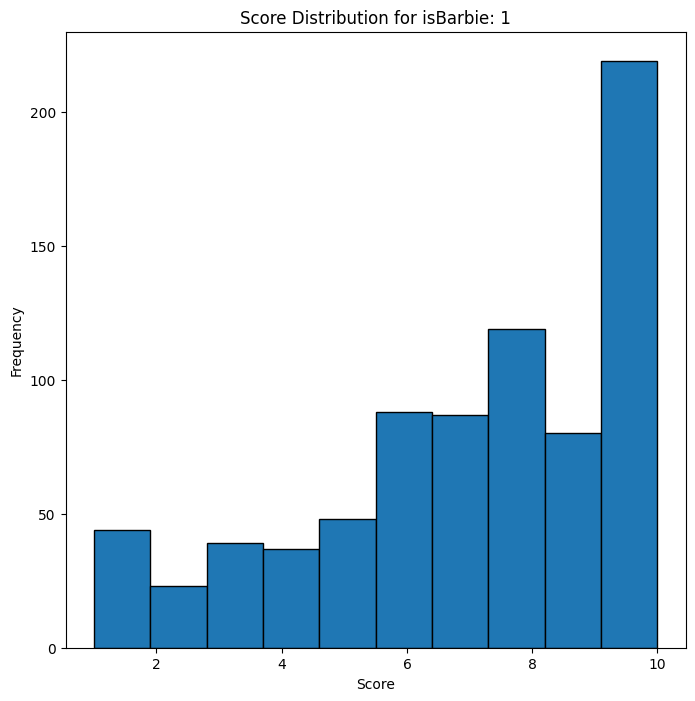

In [15]:
group_by = df.groupby('isBarbie')
for movie_id, group_data in group_by:
    plt.figure(figsize=(8, 8))
    plt.hist(group_data['score'], edgecolor='black')
    plt.title(f'Score Distribution for isBarbie: {movie_id}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

In [35]:
textdata = df[['review', 'isBarbie']]
bb = textdata[textdata['isBarbie'] == 1]
op = textdata[textdata['isBarbie'] == 0]
downsample_op = op.sample(bb.shape[0])
textdata = pd.concat([bb, downsample_op])
textdata['isBarbie'].value_counts()

1    784
0    784
Name: isBarbie, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textdata.drop(columns = ['isBarbie']), textdata['isBarbie'], stratify=textdata['isBarbie'])

In [38]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [39]:
from keras.layers import Dense, Input
from keras.optimizers import Adam

# BERT layers
text_input = Input(shape=(), dtype=tf.string)
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = Dense(1, activation='sigmoid')(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
37/37 [==============================] - 24s 390ms/step - loss: 0.7655 - accuracy: 0.6131
Epoch 2/5
37/37 [==============================] - 15s 417ms/step - loss: 0.5900 - accuracy: 0.6692
Epoch 3/5
37/37 [==============================] - 14s 374ms/step - loss: 0.4932 - accuracy: 0.7347
Epoch 4/5
37/37 [==============================] - 14s 368ms/step - loss: 0.4335 - accuracy: 0.8036
Epoch 5/5
37/37 [==============================] - 15s 409ms/step - loss: 0.4427 - accuracy: 0.7806


In [40]:
yhat_test = model.predict(X_test)
yhat_test = [1 if y >= 0.5 else 0 for y in yhat_test]
series = pd.Series(yhat_test)
series.value_counts()

13/13 [==============================] - 5s 358ms/step


1    279
0    113
dtype: int64

In [44]:
print(y_test.value_counts())

0    196
1    196
Name: isBarbie, dtype: int64


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yhat_test)
cm

array([[112,  84],
       [  1, 195]])

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.99      0.57      0.72       196
           1       0.70      0.99      0.82       196

    accuracy                           0.78       392
   macro avg       0.85      0.78      0.77       392
weighted avg       0.85      0.78      0.77       392

